In [ ]:
# #mount drive to access local files
# from google.colab import drive
# drive.mount('/content/drive') 

Mounted at /content/drive




* Neural networks
* Dimensionality Reduction 
  * https://scikit-learn.org/stable/modules/unsupervised_reduction.html
  * https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* Avoiding overfitting with the model
* Regression models like PLSR
  * https://scikit-learn.org/stable/supervised_learning.html
* Regression Trees
  * https://scikit-learn.org/stable/modules/ensemble.html
* Neural Nets
  * https://youtu.be/7sB052Pz0sQ
  * I will upload deep learning tutorial next week




In [1]:
#import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename

In [3]:
#ML models
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score, mean_absolute_error


In [6]:
#import dataframe
PATH = '/content/drive/MyDrive/AJ Drive/GRAD SCHOOL (UMD)/Winter 2023/Data Hub/Fructose and Glucose Measurement in Blood/'
file_name = '02242023_fructose_glucose_mix_signals.csv'

file_path = askopenfilename()
print(file_path)

df_data = pd.read_csv(file_path, parse_dates=['Date Imaged'])

C:/Users/mihir/OneDrive/Programs/Capstone/data/02242023_fructose_glucose_mix_signals.csv


In [7]:
df_mean = df_data.groupby(['path']).mean(numeric_only=True)
fold_label = 'glucose, mg/dL'
y_label = 'fructose, mg/dL'

folds = df_mean[fold_label].unique()

In [8]:
#get bands
idx_bands = np.where(df_mean.columns=='col')[0][0]+1
bands = df_mean.columns[idx_bands:].to_numpy().astype(str)

250.0
0.99
10.26
500.0
0.98
14.04
25.0
0.95
24.58


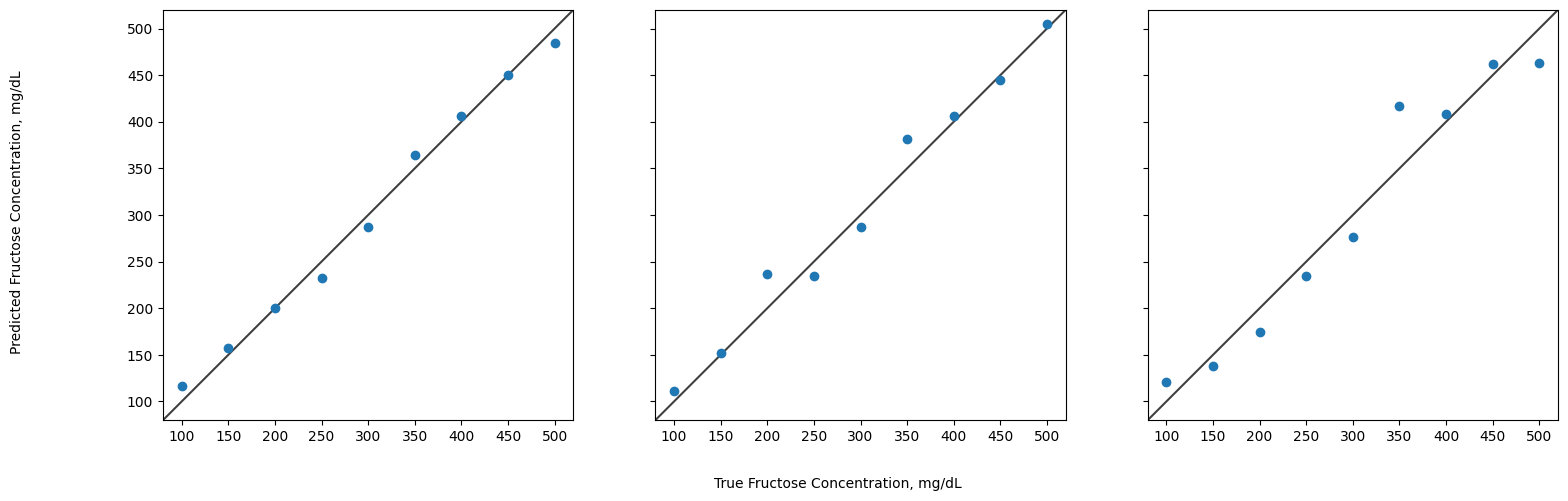

In [14]:
#code for LOCO cross validation

fig,axs = plt.subplots(1,3,sharey=True,figsize=(18, 6))

fig.text(0.5, 0.04, 'True Fructose Concentration, mg/dL', ha='center')
fig.text(0.04, 0.5, 'Predicted Fructose Concentration, mg/dL', va='center', rotation='vertical')

for i,fold in enumerate(folds[1:]):
  df_m = df_mean.set_index(fold_label).loc[[fold],:]
  concs = df_m[y_label].unique()
  pred_concs = []
  for concs_test in concs:
    concs_train = list(set(concs)-set([concs_test]))
    train_df = df_m.set_index(y_label).loc[concs_train,:]
    valid_df = df_m.set_index(y_label).loc[[concs_test],:]  
    X_train,y_train = train_df[bands].to_numpy(),train_df.index.to_numpy() #pre-processing here
    X_valid,y_valid = valid_df[bands].to_numpy(),valid_df.index.to_numpy() #pre-processing here 

    pls = PLSRegression(n_components=8) # replace with model of choice

    pls.fit(X_train,y_train)
    yp_valid = np.squeeze(pls.predict(X_valid))
    yp_valid[yp_valid<0] = 0
    pred_concs.append(np.mean(yp_valid))

  r2 = np.round(r2_score(concs,pred_concs),2)
  mae = np.round(mean_absolute_error(concs,pred_concs),2)
  axs[i].scatter(concs,pred_concs)
  axs[i].plot()

  lims = [
    np.min([axs[i].get_xlim(), axs[i].get_ylim()]),  # min of both axes
    np.max([axs[i].get_xlim(), axs[i].get_ylim()]),  # max of both axes
  ]

  axs[i].plot(lims, lims, 'k-', alpha=0.75, zorder=0)
  axs[i].set_aspect('equal')
  axs[i].set_xlim(lims)
  axs[i].set_ylim(lims)

  print(fold)
  print(r2)
  print(mae)

plt.savefig("output.png")